In [1]:
import pandas as pd

In [2]:
df_tb = pd.read_excel('H:/数据/legao3225/乐高淘宝数据.xlsx')

In [3]:
df_tb.head(10)

,goods_name,shop_name,price,purchase_num,location
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,['867人付款'],浙江 嘉兴
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,['259人付款'],浙江 杭州
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,['441人付款'],浙江 杭州
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,['358人付款'],浙江 嘉兴
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,['126人付款'],浙江 嘉兴
5,兼容乐高积木拼装玩具益智坦克大人成年高难度男孩六一儿童节礼物,童趣互娱,198.0,['6500+人付款'],广东 深圳
6,LEGO乐高科技机械组42115兰博基尼SLAN FKP 儿童益智拼装礼物收藏,nc_zone,2699.0,['85人付款'],广东 广州
7,乐高积木女孩子冰雪奇缘艾莎魔法城堡公主别墅拼装益智玩具6-12岁,草莓牛奶加冰,168.0,['2103人付款'],广东 广州
8,兼容乐高我的世界积木男孩子益智拼装玩具儿童智力动脑六一节礼物,themusicman,86.0,['7000+人付款'],广东 汕头
9,LEGO乐高42115 2020科技旗舰款 兰博基尼SIAN FKP37闪电玩具礼物,ljzgemdale,2688.0,['11人付款'],广东 深圳


In [4]:
df_tb.describe()

,price
count,4404.000000
mean,352.583837
std,612.045793
min,0.060000
25%,49.000000
50%,140.080000
75%,389.000000
max,8888.000000


In [5]:
df_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   goods_name    4404 non-null   object 
 1   shop_name     4404 non-null   object 
 2   price         4404 non-null   float64
 3   purchase_num  4404 non-null   object 
 4   location      4404 non-null   object 
dtypes: float64(1), object(4)
memory usage: 172.2+ KB


# 数据处理

- 数据去重
- good_name暂不处理
- shop_name暂不处理
- price暂不处理
- purchase_num统计人数
- 计算销售额 = purchase_num * price
- location:提取省份

In [6]:
# 去重重复值
df_tb.drop_duplicates(inplace=True)

In [7]:
# 删除购买人数为空的记录
dt_tb = df_tb[df_tb['purchase_num'].str.contains('人付款')]
dt_tb

,goods_name,shop_name,price,purchase_num,location
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,['867人付款'],浙江 嘉兴
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,['259人付款'],浙江 杭州
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,['441人付款'],浙江 杭州
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,['358人付款'],浙江 嘉兴
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,['126人付款'],浙江 嘉兴
...,...,...,...,...,...
4399,乐高 21154 LEGO 拼装积木玩具 Minecraft 我的世界系列 烈焰火桥,jericholau1022,238.0,['41人付款'],广东 中山
4400,LEGO乐高71040迪士尼城堡李现韩商言同款少女积木情人节礼物玩具,shenmeqian,2650.0,['36人付款'],江苏 南京
4401,特价促销 乐高 LEGO 71040迪士尼 10261 10255 10260 42043,rita_zhangyan,2600.0,['14人付款'],上海
4402,兼容乐高新品植物大战僵尸儿童积木玩具益智男孩农场大作战,xiemeisheng1985,45.0,['112人付款'],广东 汕头


In [8]:
df_tb['purchase_num'].str.contains('人付款')

0       True
1       True
2       True
3       True
4       True
        ... 
4399    True
4400    True
4401    True
4402    True
4403    True
Name: purchase_num, Length: 3411, dtype: bool

In [9]:
# 重置索引
df_tb = df_tb.reset_index(drop=True)
df_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   goods_name    3411 non-null   object 
 1   shop_name     3411 non-null   object 
 2   price         3411 non-null   float64
 3   purchase_num  3411 non-null   object 
 4   location      3411 non-null   object 
dtypes: float64(1), object(4)
memory usage: 133.4+ KB


In [10]:
# purchuse_num 处理
df_tb['purchase_num'] = df_tb['purchase_num'].str.extract('(\d+)').astype('int')

In [11]:
df_tb['purchase_num']

0       867
1       259
2       441
3       358
4       126
       ... 
3406     41
3407     36
3408     14
3409    112
3410    117
Name: purchase_num, Length: 3411, dtype: int32

In [12]:
# 计算销售额
df_tb['sales_volume'] = df_tb['purchase_num'] * df_tb['price']

In [13]:
# 提取省份location
df_tb['province'] = [i[0] for i in df_tb['location'].str.split(' ').values]

In [14]:
df_tb.head()

,goods_name,shop_name,price,purchase_num,location,sales_volume,province
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,867,浙江 嘉兴,1126233.0,浙江
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,259,浙江 杭州,854441.0,浙江
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,441,浙江 杭州,1234359.0,浙江
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,358,浙江 嘉兴,71242.0,浙江
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,126,浙江 嘉兴,37674.0,浙江


# 数据可视化

- 1.乐高销量排名top10店铺-条形图
- 2.乐高产地数量排名top10-条形图
- 3.乐高国内销量分布-地图
- 4.价格分布-饼图
- 5.不同价格区间的销量情况-饼图
- 6.商品标题词云图

## 乐高销量排名top10店铺-条形图

In [15]:
shop_top10 = df_tb.groupby('shop_name')['purchase_num'].sum().sort_values(ascending=False).head(10)

In [16]:
from pyecharts.charts import Bar,Line,Pie,Map,Page
import pyecharts.options as opts
from pyecharts.globals import ThemeType

In [17]:
bar1 = Bar(init_opts=opts.InitOpts(theme=ThemeType.INFOGRAPHIC))

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [18]:
bar1.add_xaxis(shop_top10.index.tolist())
bar1.add_yaxis('',shop_top10.values.tolist())

bar1.set_global_opts(
                    title_opts=opts.TitleOpts(title='乐高销量排名top10淘宝店铺'),
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)),
                    visualmap_opts=opts.VisualMapOpts(max_=28669,range_color=['red','cyan','yellow']))
bar1.render_notebook()

## 乐高产地数量排名top10

In [19]:
province_top10 = df_tb.province.value_counts()[:10]

In [20]:
bar2 = Bar()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [21]:
bar2.add_xaxis(province_top10.index.tolist())
bar2.add_yaxis('',province_top10.values.tolist())
bar2.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=1000),
                    title_opts=opts.TitleOpts(title='乐高产地数量排名top10'))
bar2.render_notebook()

## 国内各省份乐高销量分布图

In [22]:
province_num = df_tb.groupby('province')['purchase_num'].sum().sort_values(ascending=False)

In [23]:
df_tb.head()

,goods_name,shop_name,price,purchase_num,location,sales_volume,province
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,867,浙江 嘉兴,1126233.0,浙江
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,259,浙江 杭州,854441.0,浙江
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,441,浙江 杭州,1234359.0,浙江
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,358,浙江 嘉兴,71242.0,浙江
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,126,浙江 嘉兴,37674.0,浙江


In [24]:
map1 = Map()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [25]:
# 绘制地图
map1.add('',[list(z) for z in zip(province_num.index.tolist(),province_num.values.tolist())],
        maptype='china')
map1.set_global_opts(
        title_opts=opts.TitleOpts(title='国内各省份乐高销量分布图'),
        visualmap_opts=opts.VisualMapOpts(max_=province_num.max())
        )
map1.render_notebook()

In [26]:
province_num.max()

172277

## 天猫乐高价格分布

In [27]:
cut_bins = [0,50,100,200,300,500,1000,8888]
cut_label = ['0-50元','50-100元','100-200元','200-300元','300-500元','500-1000元','1000元以上']
price_cut = pd.cut(dt_tb['price'],bins=cut_bins,labels=cut_label)
price_num = price_cut.value_counts()
price_num

0-50元        895
100-200元     701
50-100元      486
500-1000元    411
300-500元     370
200-300元     288
1000元以上      260
Name: price, dtype: int64

In [28]:
bar3 = Bar()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [29]:
bar3.add_xaxis(price_num.index.tolist())
bar3.add_yaxis('',price_num.values.tolist())
bar3.set_global_opts(title_opts=opts.TitleOpts(title='天猫乐高价格分布'),
                    visualmap_opts=opts.VisualMapOpts(max_=price_num.max()))
bar3.render_notebook()

## 不同价格区间的销售额整理表现

In [30]:
df_tb['price_cut'] = price_cut

In [31]:
cut_purchase = df_tb.groupby('price_cut')['sales_volume'].sum()
cut_purchase

price_cut
0-50元         6438579.38
50-100元      12403255.78
100-200元      9938115.32
200-300元      3952180.18
300-500元      4478565.23
500-1000元     4533792.74
1000元以上       6470266.35
Name: sales_volume, dtype: float64

In [32]:
# 绘制饼图
# 准备数据
data_pair = [list(i) for i in zip(cut_purchase.index.tolist(),cut_purchase.values.tolist())]

In [33]:
pie1 = Pie()
pie1 = Pie(init_opts=opts.InitOpts(width='800px', height='500px')) 
pie1.add('',data_pair,radius=['35%','60%'])   # 添加数据对，设置半径
pie1.set_global_opts(title_opts=opts.TitleOpts(title='不同价格区间的销售额'),
                   legend_opts=opts.LegendOpts(orient='vertical',pos_top='15%',pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter='{b}:{d}%'))
pie1.set_colors(['#EF9050', '#3B7BA9', '#6FB27C', '#FFAF34', '#D8BFD8', '#00BFFF', '#7FFFAA'])


pie1.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


## 商品标题词云图

In [34]:
import jieba

In [35]:
df_tb.head()

,goods_name,shop_name,price,purchase_num,location,sales_volume,province,price_cut
0,乐高旗舰店官网悟空小侠系列80012孙悟,乐高官方旗舰店,1299.0,867,浙江 嘉兴,1126233.0,浙江,1000元以上
1,LEGO乐高 71043收藏版哈利波特霍格沃兹城堡玩具礼物,天猫国际进口超市,3299.0,259,浙江 杭州,854441.0,浙江,1000元以上
2,LEGO乐高机械组布加迪42083粉丝收藏旗舰款玩具模型礼物,天猫国际进口超市,2799.0,441,浙江 杭州,1234359.0,浙江,1000元以上
3,乐高旗舰店官网3月新品76895超级赛车系列法拉利赛车积木玩具男孩,乐高官方旗舰店,199.0,358,浙江 嘉兴,71242.0,浙江,100-200元
4,乐高旗舰店官网3月新品得宝系列10921超级英雄实验室大颗粒益智,乐高官方旗舰店,299.0,126,浙江 嘉兴,37674.0,浙江,200-300元


In [36]:
def get_cut_words(content_series):
    # 创建停用词列表
    stop_words = []
    with open('G:/Python/Python就业班/阶段9-人工智能NLP项目/第六天/代码/chatservice/corpus/stopwords.txt','r',encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())
    
    # 创建关键词列表
    my_words = ['乐高','大颗粒','小颗粒']
    for i in my_words:
        jieba.add_word(i)
    
    # 分词
    word_cut = jieba.lcut(content_series.str.cat(sep='。'),cut_all=False)
    
    # 条件筛选
    word_cut_select = [i for i in word_cut if i not in stop_words and len(i)>=2]
    
    return word_cut_select
    

In [37]:
text = get_cut_words(content_series=df_tb['goods_name'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DELL\AppData\Local\Temp\jieba.cache
Loading model cost 1.164 seconds.
Prefix dict has been built successfully.


In [38]:
text[:10]

['乐高', '旗舰店', '官网', '悟空', '小侠', '系列', '80012', '孙悟', 'LEGO', '乐高']

In [39]:
import stylecloud
from IPython.display import Image

<frozen importlib._bootstrap>:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
D:\Anaconda\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='D:\\Anaconda\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp936'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


In [40]:
# 绘制词云图
stylecloud.gen_stylecloud(text=' '.join(text),
                         collocations=False,
                         font_path = 'C:/Windows/Fonts/msyh.ttc', 

                         icon_name='fas fa-plane',
                         size = 768,
                         background_color='black',
                         output_name = '淘宝乐高标题词云图.png'
                         )


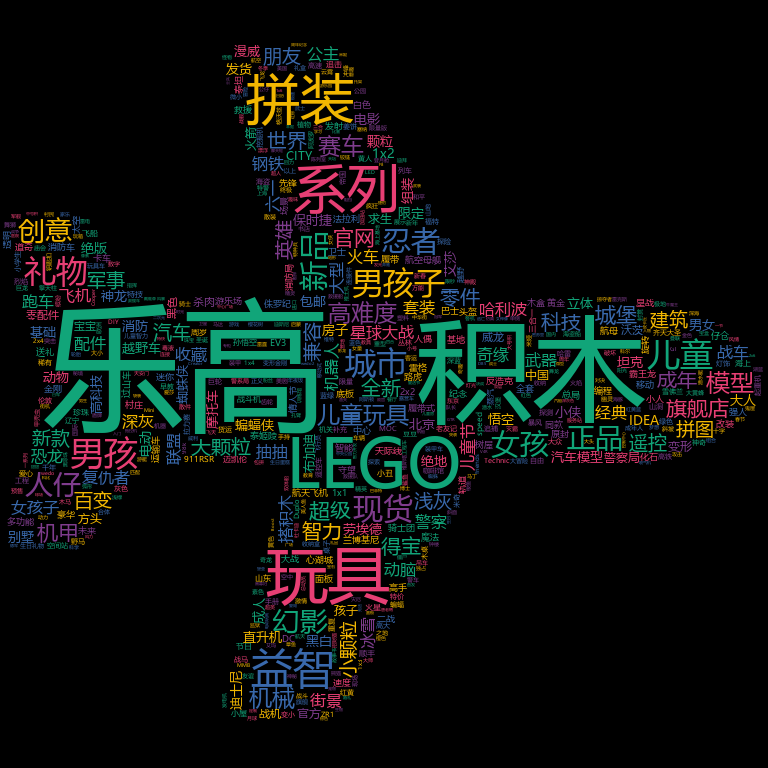

In [41]:
Image(filename='淘宝乐高标题词云图.png')

# 乐高天猫旗舰店数据分析

In [42]:
df_tm = pd.read_excel('H:/数据/legao3225/天猫乐高旗舰店数据.xlsx')

D:\Anaconda\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
D:\Anaconda\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [43]:
df_tm.head()

,title,age_range,price,sales_num,comment_num,color_cat
0,乐高哈利波特系列霍格沃茨城堡71043成人收藏,适用年龄范围：16+岁,3999.00,139,511,71043 霍格沃兹城堡
1,乐高旗舰店Ideas系列21319中央咖啡厅老友记收藏送礼,适用年龄16岁+,699.00,454,1299,无
2,乐高旗舰店官网2020年新品10269 哈雷戴维森®肥仔®摩托车成人收藏,NaN,999.00,276,509,无
3,乐高旗舰店官网2020年新品Ideas系列21320恐龙化石男女孩玩具礼物,NaN,599.00,359,524,无
4,乐高旗舰店官网10874智能蒸汽火车遥控轨道大颗粒益智积木玩具,适用年龄范围：2-5岁,549.00,806,2884,10874蒸汽智能火车


In [44]:
df_tm.drop_duplicates(inplace=True)

In [45]:
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 385
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        369 non-null    object
 1   age_range    317 non-null    object
 2   price        369 non-null    object
 3   sales_num    369 non-null    object
 4   comment_num  369 non-null    int64 
 5   color_cat    369 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.2+ KB


## 数据处理

In [46]:
# 价格处理
def transform_price(x):
    if '-' in x:
        return (float(x.split('-')[1])-float(x.split('-')[0]))/2
    else:
        return x


In [47]:
# 价格类型转换
df_tm['price'] = df_tm.price.apply(lambda x:transform_price(x)).astype('float')

In [80]:
df_tm.price

0      3999.0
1       699.0
2       999.0
3       599.0
4       549.0
5       499.0
6       899.0
7      1199.0
8       299.0
9       449.0
10      349.0
11      299.0
12      199.0
13      699.0
14      299.0
15      299.0
16      399.0
17      299.0
18     2099.0
19      199.0
20      499.0
21      299.0
22      299.0
23      299.0
24      299.0
25      399.0
26      299.0
27      499.0
28      199.0
29      299.0
30     1099.0
31      249.0
32      299.0
33      899.0
34      599.0
35      349.0
36       99.0
37      299.0
38      799.0
39      400.0
40      399.0
41      799.0
42      349.0
43      450.0
44      299.0
45      899.0
46     1999.0
47      199.0
48      139.0
49      449.0
50      499.0
51      999.0
52      199.0
53     3799.0
54     1199.0
55      649.0
56      399.0
57      449.0
58      499.0
59      299.0
60       99.0
61      199.0
62      549.0
63      299.0
64      299.0
65      400.0
66      199.0
67      199.0
68      399.0
69      229.0
70     1850.0
71    

In [79]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

In [48]:
# sales_num缺失值处理
df_tm['sales_num'].describe()

count     369
unique    180
top         无
freq       44
Name: sales_num, dtype: object

In [49]:
num = 0
sum = 0
for i in list(df_tm['sales_num'].values):
    if i != '无':
        i = int(i)
        num += 1
        sum += i
print(sum/num)
    

194.0553846153846


In [50]:
round(sum/num,2)

194.06

In [51]:
# 替换sales_num中的无
df_tm['sales_num'] = df_tm['sales_num'].replace('无',round(sum/num,1))

In [52]:
df_tm['sales_num'] = df_tm.sales_num.astype('int')

In [53]:
df_tm.head()

,title,age_range,price,sales_num,comment_num,color_cat
0,乐高哈利波特系列霍格沃茨城堡71043成人收藏,适用年龄范围：16+岁,3999.0,139,511,71043 霍格沃兹城堡
1,乐高旗舰店Ideas系列21319中央咖啡厅老友记收藏送礼,适用年龄16岁+,699.0,454,1299,无
2,乐高旗舰店官网2020年新品10269 哈雷戴维森®肥仔®摩托车成人收藏,NaN,999.0,276,509,无
3,乐高旗舰店官网2020年新品Ideas系列21320恐龙化石男女孩玩具礼物,NaN,599.0,359,524,无
4,乐高旗舰店官网10874智能蒸汽火车遥控轨道大颗粒益智积木玩具,适用年龄范围：2-5岁,549.0,806,2884,10874蒸汽智能火车


In [54]:
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 385
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        369 non-null    object 
 1   age_range    317 non-null    object 
 2   price        369 non-null    float64
 3   sales_num    369 non-null    int32  
 4   comment_num  369 non-null    int64  
 5   color_cat    369 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 18.7+ KB


In [55]:
# 标题处理
df_tm['title'] = df_tm['title'].str.replace('乐高旗舰店|官网|2020年','')

In [56]:
df_tm['sales_valumes'] = df_tm['price'] * df_tm['sales_num']

In [57]:
df_tm.head()

,title,age_range,price,sales_num,comment_num,color_cat,sales_valumes
0,乐高哈利波特系列霍格沃茨城堡71043成人收藏,适用年龄范围：16+岁,3999.0,139,511,71043 霍格沃兹城堡,555861.0
1,Ideas系列21319中央咖啡厅老友记收藏送礼,适用年龄16岁+,699.0,454,1299,无,317346.0
2,新品10269 哈雷戴维森®肥仔®摩托车成人收藏,NaN,999.0,276,509,无,275724.0
3,新品Ideas系列21320恐龙化石男女孩玩具礼物,NaN,599.0,359,524,无,215041.0
4,10874智能蒸汽火车遥控轨道大颗粒益智积木玩具,适用年龄范围：2-5岁,549.0,806,2884,10874蒸汽智能火车,442494.0


In [58]:
# 统计玩具的总销量排行
rank_top10 = df_tm.groupby('title')['sales_num'].sum().sort_values(ascending=False)[:10]
rank_top10

title
悟空小侠系列80012孙悟空齐天大圣黄金机甲              5897
42096保时捷911RSR赛车成人送礼收藏车模            3818
乐高5月新品悟空小侠系列80008悟空小侠云霄战机孙悟空齐天大圣    2779
42093雪佛兰科尔维特ZR1跑车积木玩具汽车             2727
城市组60226火星探测航天飞机                    2424
幻影忍者系列 71699 雷霆突击战车                 2265
城市组太空系列60226火星探测航天飞机积木玩具            1862
乐高60215消防局男女孩儿童益智玩具积木送礼             1814
10874智能蒸汽火车遥控轨道大颗粒益智积木玩具            1615
10874智能蒸汽火车遥控轨道积木玩具                 1565
Name: sales_num, dtype: int32

## 数据可视化

### 销量排行

In [59]:
# 统计玩具的月销量排行
rank_top10 = df_tm.sort_values('sales_num',ascending=False).head(10)[['title','sales_num']]

In [60]:
# 绘制条形图
x_data = rank_top10.title.tolist()
y_data = rank_top10.sales_num.tolist()

In [61]:
bar1 = Bar()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [62]:
bar1.add_xaxis(x_data)
bar1.add_yaxis('',y_data)
bar1.set_global_opts(title_opts=opts.TitleOpts(title='乐高旗舰店月销量排名'),)
#                     visualmap_opts=opts.VisualMapOpts(max_=5000))
bar1.set_series_opts(label_opts='right')
bar1.reversal_axis()
bar1.render_notebook()

### 价格区间销量

In [63]:
cut_bins = [0,200,400,600,800,1000,2000,9469]
cut_labels = ['0~50元', '50~100元', '100~200元', '200~300元', '300~500元', '500~1000元', '1000元以上']

In [64]:
price_cut = pd.cut(df_tm['price'],bins=cut_bins,labels=cut_labels)
price_cut

0        1000元以上
1       200~300元
2       300~500元
3       100~200元
4       100~200元
         ...    
380     100~200元
381     300~500元
382     300~500元
383    500~1000元
385     200~300元
Name: price, Length: 369, dtype: category
Categories (7, object): [0~50元 < 50~100元 < 100~200元 < 200~300元 < 300~500元 < 500~1000元 < 1000元以上]

In [65]:
price_num =  price_cut.value_counts()

In [66]:
price_num

100~200元     86
50~100元      71
500~1000元    61
0~50元        52
200~300元     39
300~500元     35
1000元以上      25
Name: price, dtype: int64

In [67]:
bar2 = Bar()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [68]:
bar2.add_xaxis(price_num.index.tolist())
bar2.add_yaxis('',price_num.values.tolist())
bar2.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=90))
bar2.render_notebook()

### 价格区间销售额

In [69]:
# 添加price-cut列
df_tm['price_cut'] = price_cut

In [70]:
# 按price_cut分组，计算每个价格区间的购买人数
cut_purchase = df_tm.groupby('price_cut')['sales_valumes'].sum()
cut_purchase

price_cut
0~50元         1026784.0
50~100元       5748156.0
100~200元     11219226.0
200~300元      4892961.0
300~500元      2987058.0
500~1000元    20069273.0
1000元以上       7591867.0
Name: sales_valumes, dtype: float64

In [71]:
# 绘制扇形图
# 准备数据,数据对
data_pair = [list(z) for z in zip(cut_purchase.index.tolist(),cut_purchase.values.tolist())]

In [72]:
pie1 = Pie()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [73]:
pie1.add('',data_pair,radius=['35%','60%'])
pie1.set_global_opts(legend_opts=opts.LegendOpts(orient='vertical',pos_top='15%',pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter='{b}:{d}%'))  # 数据项：百分比
pie1.render_notebook()

### title词云图

In [74]:
text = get_cut_words(df_tm['title'])
text[:5]

['乐高', '哈利波', '系列', '霍格', '沃茨']

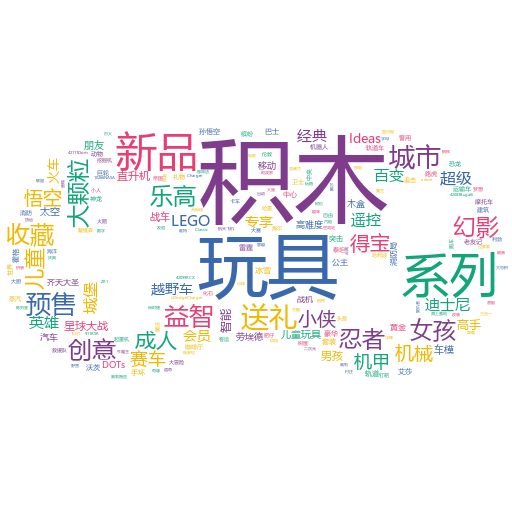

In [75]:
stylecloud.gen_stylecloud(text=' '.join(text),
                         collocations=False,
                         font_path='C:/Windows/Fonts/msyh.ttc',
                         icon_name='fas fa-gamepad',
                          output_name='乐高旗舰店商品标题词云图.png'
                         )
Image(filename='乐高旗舰店商品标题词云图.png')

In [76]:
a = '你们今天去干了什么为什么不会阿狸去找我'

In [83]:
df_tb['location'].str.split(' ')

0        [浙江, 嘉兴]
1        [浙江, 杭州]
2        [浙江, 杭州]
3        [浙江, 嘉兴]
4        [浙江, 嘉兴]
5        [广东, 深圳]
6        [广东, 广州]
7        [广东, 广州]
8        [广东, 汕头]
9        [广东, 深圳]
10           [北京]
11           [上海]
12       [广东, 汕头]
13       [广东, 广州]
14           [上海]
15           [上海]
16           [上海]
17           [上海]
18           [北京]
19           [上海]
20           [北京]
21       [广东, 广州]
22           [上海]
23           [上海]
24           [北京]
25           [上海]
26           [北京]
27       [广东, 汕头]
28       [广东, 汕头]
29           [上海]
30       [湖北, 武汉]
31       [广东, 深圳]
32           [上海]
33           [上海]
34           [北京]
35           [上海]
36       [广东, 深圳]
37           [北京]
38       [江苏, 无锡]
39           [上海]
40       [广东, 汕头]
41           [上海]
42           [上海]
43           [上海]
44       [广东, 中山]
45           [上海]
46           [上海]
47           [北京]
48       [广东, 广州]
49       [广东, 汕头]
50       [广东, 汕头]
51           [上海]
52       [广东, 深圳]
53           [上海]
54           [上海]
55       [

In [81]:
df_tb.location

0        浙江 嘉兴
1        浙江 杭州
2        浙江 杭州
3        浙江 嘉兴
4        浙江 嘉兴
5        广东 深圳
6        广东 广州
7        广东 广州
8        广东 汕头
9        广东 深圳
10          北京
11          上海
12       广东 汕头
13       广东 广州
14          上海
15          上海
16          上海
17          上海
18          北京
19          上海
20          北京
21       广东 广州
22          上海
23          上海
24          北京
25          上海
26          北京
27       广东 汕头
28       广东 汕头
29          上海
30       湖北 武汉
31       广东 深圳
32          上海
33          上海
34          北京
35          上海
36       广东 深圳
37          北京
38       江苏 无锡
39          上海
40       广东 汕头
41          上海
42          上海
43          上海
44       广东 中山
45          上海
46          上海
47          北京
48       广东 广州
49       广东 汕头
50       广东 汕头
51          上海
52       广东 深圳
53          上海
54          上海
55       浙江 杭州
56          北京
57       浙江 嘉兴
58       浙江 嘉兴
59       广东 广州
60       广东 广州
61          上海
62          上海
63          上海
64          上海
65          上海
66        